## <b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>Library Services</div></b>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/library-services-dataset/Library_Services_20240831.csv


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

This dataset contains information about each library, such as the branch name, address, city, ZIP code, square footage, inventory size, contact details, accessibility features, and available public transportation options. Additionally, the it contains geographical data like latitude and longitude, which can be used for spatial analysis or mapping purposes. I believe there is several analyses can be performed to derive meaningful insights such as:

* Geospatial Analysis: To visualize the geographic distribution of library branches and assess their accessibility in relation to population density and public transportation options.
* Descriptive Statistics: To summarize the central tendencies, variability, and overall distribution of key variables such as inventory size, square footage, and population size.
* Correlation Analysis: To identify relationships between different variables, such as the relationship between inventory size and square footage or between population size and the number of available library services.
* Resource Utilization Analysis: To evaluate how efficiently each library branch utilizes its space and inventory in serving the local community.

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Downloading Dataset</div></b>

In [3]:
df = pd.read_csv('/kaggle/input/library-services-dataset/Library_Services_20240831.csv')

In [4]:
# Check Dataset

print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,Branch,Webpage,Address,City,Zip,Square Feet,Inventory,Population Size,Phone,TTY Phone,...,metrobus Q1,metrobus Q2,metrobus T2,metrobus z2,metrobus Z8,metrobus Z6,metrobus Z9,Latitude,Longitude,Location
0,Aspen Hill,http://montgomerycountymd.gov/Library/branches...,4407 Aspen Hill Road,Rockville,20853,16100,78647,NaN,240-773-9410,301-871-2097,...,n,n,n,n,n,n,n,39.079524,-77.088752,4407 Aspen Hill Rd\nRockville 20853\n(39.07916...
1,Gaithersburg,http://montgomerycountymd.gov/Library/branches...,18330 Montgomery Village Avenue,Gaithersburg,20879,62525,153055,NaN,240-773-9490,NaN,...,n,n,n,n,n,n,n,39.158089,-77.205466,18330 Montgomery Village Ave\nGaithersburg 208...
2,Maggie Nightingale,http://montgomerycountymd.gov/Library/branches...,19633 Fisher Avenue,Poolseville,20837,6250,38456,NaN,240-773-9550,301-972-7825,...,n,n,n,n,n,n,n,39.145139,-77.410286,19633 Fisher Avenue\nPoolseville 20837\n(39.14...
3,Potomac,http://montgomerycountymd.gov/Library/branches...,10101 Glenolden Drive,Potomac,20854,16000,92628,NaN,240-777-0690,301-765-4083,...,n,n,y,n,n,n,n,39.019274,-77.207797,10101 Glenolden Drive\nPotomac 20854\n(39.0188...
4,White Oak,http://montgomerycountymd.gov/Library/branches...,11701 New Hampshire Avenue,Silver Spring,20904,16205,94217,NaN,240-773-9555,NaN,...,n,n,n,y,y,n,n,39.048025,-76.992139,"11701 New Hampshire Avenue\n(39.047701, -76.99..."


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [5]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)
    
summary(df)

data shape: (21, 105)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Branch,object,0,0.0,0,21,21,NaN,NaN,NaN,NaN,Aspen Hill,Gaithersburg,Maggie Nightingale
Webpage,object,0,0.0,0,21,21,NaN,NaN,NaN,NaN,http://montgomerycountymd.gov/Library/branches...,http://montgomerycountymd.gov/Library/branches...,http://montgomerycountymd.gov/Library/branches...
Address,object,0,0.0,0,21,21,NaN,NaN,NaN,NaN,4407 Aspen Hill Road,18330 Montgomery Village Avenue,19633 Fisher Avenue
City,object,0,0.0,0,13,21,NaN,NaN,NaN,NaN,Rockville,Gaithersburg,Poolseville
Zip,int64,0,0.0,0,20,21,20814.0,20910.0,20862.619048,32.212538,20853,20879,20837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
metrobus Z6,object,0,0.0,0,2,21,NaN,NaN,NaN,NaN,n,n,n
metrobus Z9,object,0,0.0,0,2,21,NaN,NaN,NaN,NaN,n,n,n
Latitude,float64,0,0.0,0,21,21,38.95885,39.228809,39.077473,0.078792,39.079524,39.158089,39.145139
Longitude,float64,0,0.0,0,21,21,-77.410286,-76.940748,-77.121159,0.107617,-77.088752,-77.205466,-77.410286


In [6]:
# Check null data
df.isnull().sum().sum()

65

### <b><span style='color:#DEB078'></span><span style='color:#2368e1'> There are 65 null data, but we will not exclude them.</span></b>

In [7]:
# Check duplicate data
df.duplicated().sum().sum()

0

### <b><span style='color:#DEB078'></span><span style='color:#2368e1'> There is no duplicate data</span></b>

In [8]:
# Rename strings for better understanding.
df = df.replace(to_replace =["y", "n"], value =["yes", "no"])

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

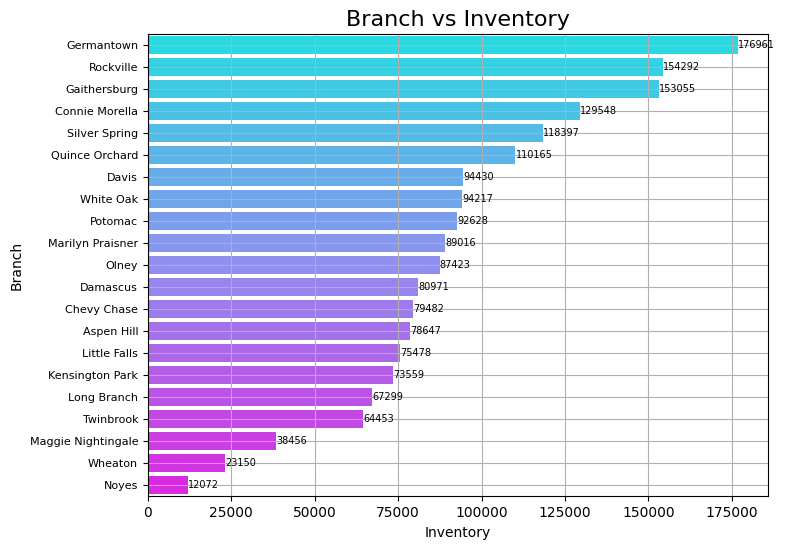

In [9]:
# Branch vs Inventory

fig, ax = plt.subplots(figsize=(8, 6))
df_city = df.groupby(['Branch'])[['Inventory']].mean()
df_city.reset_index(level=0, inplace=True)
df_city = df_city.sort_values("Inventory", axis = 0, ascending = False)
sns.barplot(data=df_city, y="Branch", x="Inventory", palette = 'cool')
ax.bar_label(ax.containers[0], fmt='%0.0f', rotation = 0, fontsize = 7)
plt.title("Branch vs Inventory", fontsize = 16)
plt.yticks(rotation=0, fontsize = 8)
plt.grid()
plt.show()

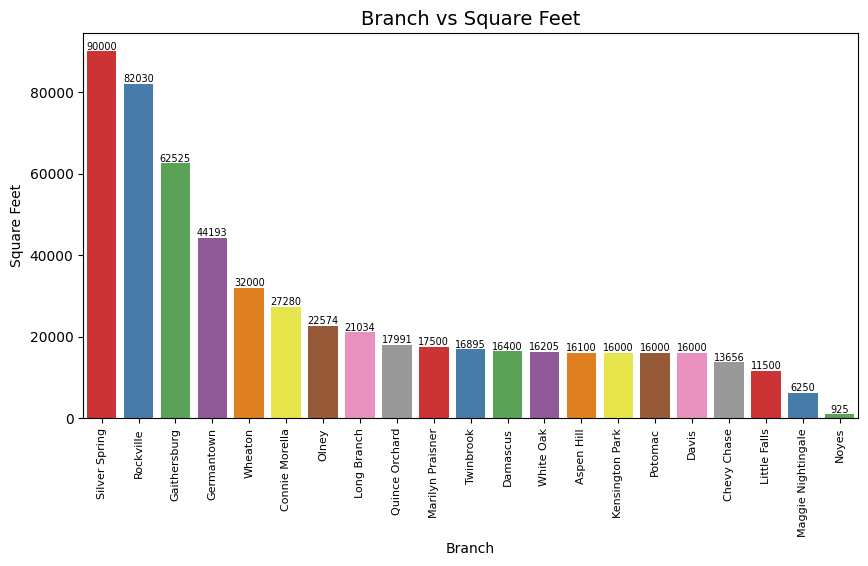

In [10]:
# Branch vs Square Feet
fig, ax = plt.subplots(figsize=(10, 5))
df = df.sort_values("Square Feet", axis = 0, ascending = False)
sns.barplot(data=df, x = 'Branch', y = 'Square Feet', palette = 'Set1')
plt.title("Branch vs Square Feet", fontsize = 14)
plt.xticks(rotation=90, fontsize = 8)
ax.bar_label(ax.containers[0], fmt='%0.0f', rotation = 0, fontsize = 7)
plt.show()

In [11]:
cols = ['Square Feet',
       'Inventory',
       'Collaboration',
       'Computers'
       ]

colors = ["#8c0404","#f25ed0","#21618C","#16A085","#34495E",
          "#C70039", "#FF5733", "#FFC300", "#DAF7A6", "#B3B6B7",
          '#6495ED', '#40E0D0', '#9FE2BF', '#CCCCFF']

In [12]:
# Branch vs 'cols'

for i in cols:
    
    if i == 'Square Feet':

        df_top = df.groupby(['Branch'])[['Square Feet']].mean()
        df_top = df_top.sort_values(by=("Square Feet"), ascending=False).head(14)

        iplot(px.bar(df_top[:14],
             text_auto = True,
             color = df_top[:14].index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value=""),
             title = 'Branch vs Square Feet'
            ))   
    
    else:
        
        df_top = df.groupby(['Branch'])[[i]].mean()
        df_top = df_top.sort_values(by=[i], ascending=False).head(14)

        iplot(px.bar(df_top[:14],
             text_auto = True,
             color = df_top[:14].index,
             color_discrete_sequence = colors, 
             labels=dict(index="Count Names",value=""),
             title = 'Top Branch vs ' +i
             ))

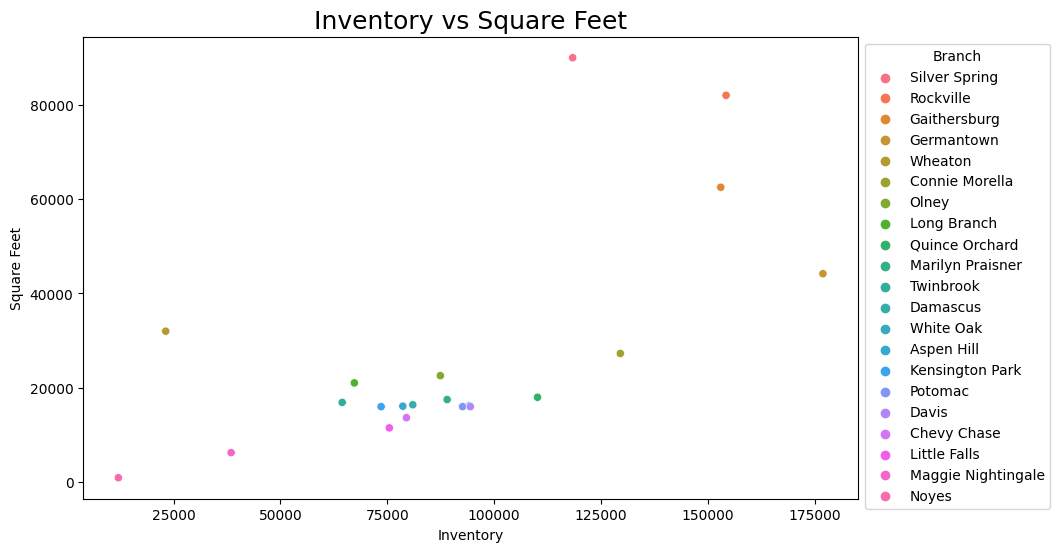

In [13]:
# Inventory vs Square Feet
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x="Inventory", y="Square Feet", hue="Branch")
plt.title("Inventory vs Square Feet", fontsize = 18)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Branch')

plt.show()

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#2368e1'> Opening Hours</span></b> 

In [14]:
df_s = df[df.columns[10:24]]
extracted_col = df["Branch"] 
df_s.insert(0, "Branch", extracted_col)
df_s.head()

,Branch,Sunday Open,Sunday Close,Monday Open,Monday Close,Tuesday Open,Tuesday Close,Wednesday Open,Wednesday Close,Thursday Open,Thursday Close,Friday Open,Friday Close,Saturday Open,Saturday Close
10,Silver Spring,1.0,5.0,10.0,6.0,1.0,9.0,10.0,6.0,1.0,9.0,10.0,6.0,10.0,6.0
15,Rockville,1.0,5.0,10.0,6.0,1.0,9.0,10.0,6.0,1.0,9.0,10.0,6.0,10.0,6.0
1,Gaithersburg,1.0,5.0,10.0,6.0,1.0,9.0,10.0,6.0,1.0,9.0,10.0,6.0,10.0,6.0
6,Germantown,1.0,5.0,10.0,6.0,1.0,9.0,10.0,6.0,1.0,9.0,10.0,6.0,10.0,6.0
18,Wheaton,1.0,5.0,10.0,6.0,1.0,9.0,10.0,6.0,1.0,9.0,10.0,6.0,10.0,6.0


In [15]:
df_pivoted_days = df_s.melt(id_vars=['Branch'],
                     value_vars=["Sunday Open", "Sunday Close", "Monday Open", "Monday Close", "Tuesday Open", "Tuesday Close", "Wednesday Open", "Wednesday Close", "Thursday Open", "Thursday Close", "Friday Open", "Friday Close", "Saturday Open", "Saturday Close"],
                     var_name='Days', value_name='Hour')

In [16]:
days_dropdown = widgets.Dropdown(
    options=df_pivoted_days['Branch'].unique(),
    description='Branch:',
    disabled=False,)


def update_day(branch):
    filtered_data = df_pivoted_days[(df_pivoted_days['Branch'] == branch)]
    if filtered_data.empty:
            print(f"No data available for {days}")
    else:
            print(filtered_data[['Days','Hour']])

widgets.interactive(update_day, branch=days_dropdown)

interactive(children=(Dropdown(description='Branch:', options=('Silver Spring', 'Rockville', 'Gaithersburg', '…

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#2368e1'> Metrobus</span></b> 

In [17]:
df_m = df[df.columns[86:102]]
extracted_col = df["Branch"] 
df_m.insert(0, "Branch", extracted_col)
df_m.head()

,Branch,metrobus c2,metrobus c4,metrobus C8,metrobus d5,metrobus f4,metrobus j2,metrobus j3,metrobus j4,metrobus l8,metrobus Q1,metrobus Q2,metrobus T2,metrobus z2,metrobus Z8,metrobus Z6,metrobus Z9
10,Silver Spring,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no
15,Rockville,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,Gaithersburg,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
6,Germantown,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
18,Wheaton,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [18]:
df_pivoted_metro = df_m.melt(id_vars=['Branch'],
                     value_vars=['metrobus c2', 'metrobus c4', 'metrobus C8', 'metrobus d5', 'metrobus f4', 'metrobus j2', 'metrobus j3', 'metrobus j4', 'metrobus l8', 'metrobus Q1', 'metrobus Q2', 'metrobus T2', 'metrobus z2', 'metrobus Z8', 'metrobus Z6', 'metrobus Z9'],
                     var_name='Metrobus', value_name='Yes/No')

In [19]:
metro_dropdown = widgets.Dropdown(
    options=df_pivoted_metro['Branch'].unique(),
    description='Branch:',
    disabled=False,)


def update_metro(branch):
    filtered_metro = df_pivoted_metro[(df_pivoted_metro['Branch'] == branch)]
    if filtered_metro.empty:
            print(f"No data available for {metro}")
    else:
            print(filtered_metro[['Metrobus','Yes/No']])

widgets.interactive(update_metro, branch=metro_dropdown)

interactive(children=(Dropdown(description='Branch:', options=('Silver Spring', 'Rockville', 'Gaithersburg', '…

### <b><span style='color:#DEB078'>5.3 |</span><span style='color:#2368e1'> Bus</span></b> 

In [20]:
df_b = df[df.columns[54:86]]
extracted_col = df["Branch"] 
df_b.insert(0, "Branch", extracted_col)
df_b.head()

,Branch,Bus 4,Bus 5,Bus 6,Bus 7,Bus 9,Bus 12,Bus 14,Bus 15,Bus 16,...,Bus 55,Bus 56,Bus 58,Bus 59,Bus 76,Bus 90,Bus 97,Bus 98,Bus j2,Bus l8
10,Silver Spring,no,no,no,no,no,no,no,yes,yes,...,no,no,no,no,no,no,no,no,no,no
15,Rockville,no,no,no,no,no,no,no,no,no,...,yes,no,no,no,no,no,no,no,no,no
1,Gaithersburg,no,no,no,no,no,no,no,no,no,...,yes,yes,yes,yes,no,no,no,no,no,no
6,Germantown,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,yes,yes,no,no
18,Wheaton,no,no,no,no,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no


In [21]:
df_pivoted_bus = df_b.melt(id_vars=['Branch'],
                     value_vars=['Bus 4', 'Bus 5', 'Bus 6', 'Bus 7', 'Bus 9', 'Bus 12', 'Bus 14', 'Bus 15', 'Bus 16', 'Bus 17', 'Bus 19', 'Bus 20', 'Bus 23', 'Bus 26', 'Bus 29', 'Bus 33', 'Bus 34', 'Bus 36', 'Bus 45', 'Bus 47', 'Bus 48', 'Bus 53', 'Bus 55', 'Bus 56', 'Bus 58', 'Bus 59', 'Bus 76', 'Bus 90', 'Bus 97', 'Bus 98', 'Bus j2', 'Bus l8'],
                     var_name='Bus', value_name='Yes/No')

In [22]:
bus_dropdown = widgets.Dropdown(
    options=df_pivoted_bus['Branch'].unique(),
    description='Branch:',
    disabled=False,)


def update_bus(branch):
    filtered_bus = df_pivoted_bus[(df_pivoted_bus['Branch'] == branch)]
    if filtered_bus.empty:
            print(f"No data available for {bus}")
    else:
            print(filtered_bus[['Bus','Yes/No']])

widgets.interactive(update_bus, branch=bus_dropdown)

interactive(children=(Dropdown(description='Branch:', options=('Silver Spring', 'Rockville', 'Gaithersburg', '…

### <b><span style='color:#DEB078'>5.4 |</span><span style='color:#2368e1'> Race</span></b> 

In [23]:
df_r = df[df.columns[36:51]]
extracted_col = df["Branch"] 
df_r.insert(0, "Branch", extracted_col)
df_r.head()

,Branch,amharic child,chinese adult,chinese child,farsi adult,farsi child,french adult,french child,korean adult,korean child,russian adult,russian child,spanish adult,spanish child,vietnamese adult,vietnamese child
10,Silver Spring,yes,yes,yes,no,no,no,no,no,no,no,no,yes,yes,yes,yes
15,Rockville,no,yes,yes,no,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
1,Gaithersburg,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes
6,Germantown,no,yes,yes,no,no,no,no,no,no,no,no,yes,yes,no,no
18,Wheaton,no,yes,yes,no,no,no,no,no,no,no,no,yes,yes,yes,yes


In [24]:
df_pivoted_race = df_r.melt(id_vars=['Branch'],
                     value_vars=['amharic child', 'chinese adult', 'chinese child', 'farsi adult', 'farsi child', 'french adult', 'french child', 'korean adult', 'korean child', 'russian adult', 'russian child', 'spanish adult', 'spanish child', 'vietnamese adult', 'vietnamese child'],
                     var_name='Race', value_name='Yes/No')

In [25]:
race_dropdown = widgets.Dropdown(
    options=df_pivoted_race['Branch'].unique(),
    description='Branch:',
    disabled=False,)


def update_race(branch):
    filtered_race = df_pivoted_race[(df_pivoted_race['Branch'] == branch)]
    if filtered_race.empty:
            print(f"No data available for {days}")
    else:
            print(filtered_race[['Race','Yes/No']])

widgets.interactive(update_race, branch=race_dropdown)

interactive(children=(Dropdown(description='Branch:', options=('Silver Spring', 'Rockville', 'Gaithersburg', '…

### <b><span style='color:#DEB078'>5.5 |</span><span style='color:#2368e1'> Miscelaneas</span></b> 

In [26]:
df_m = df[['Address', 'City', 'Zip', 'Phone', 'TTY Phone', 'Wi-Fi', 'Charging', 'Go Kits', 'Literacy After School', 'Collaboration', 'Computers', 'Discovery Room', '3D printers', 'makerspace', 'E-Reader', 'Laptops', 'Metro Station', 'Bike Share 2', 'Bike Share 1', 'Latitude', 'Longitude', 'Location']]
extracted_col = df["Branch"] 
df_m.insert(0, "Branch", extracted_col)
df_m.head()

,Branch,Address,City,Zip,Phone,TTY Phone,Wi-Fi,Charging,Go Kits,Literacy After School,...,3D printers,makerspace,E-Reader,Laptops,Metro Station,Bike Share 2,Bike Share 1,Latitude,Longitude,Location
10,Silver Spring,900 Wayne Avenue,Silver Spring,20910,240-773-9420,NaN,yes,yes,yes,yes,...,yes,no,no,yes,silver spring,ellsworth dr,fenton st,38.994918,-77.024769,"900 Wayne Ave\n(38.995311, -77.024591)"
15,Rockville,21 Maryland Avenue,Rockville,20850,240-777-0140,NaN,yes,yes,yes,yes,...,no,yes,no,no,rockville,maryland ave,e montgomery ave,39.086560,-77.151429,21 Maryland Avenue\nRockville 20850\n(39.08657...
1,Gaithersburg,18330 Montgomery Village Avenue,Gaithersburg,20879,240-773-9490,NaN,yes,yes,yes,yes,...,no,no,yes,no,shady grove,shady grove metro,shady grove metro,39.158089,-77.205466,18330 Montgomery Village Ave\nGaithersburg 208...
6,Germantown,19840 Century Blvd.,Germantown,20874,240-777-0110,NaN,yes,yes,yes,yes,...,no,no,yes,no,no,pleasant dr,king farm blvd,39.181909,-77.266124,19840 Century Blvd\nGermantown 20874\n(39.1815...
18,Wheaton,11701 Georgia Avenue,Wheaton,20902,240-777-0678,NaN,yes,yes,yes,yes,...,no,no,no,no,wheaton,lyttonsville pl,lyttonsville rd,39.046780,-77.051307,"2400 Arcola Ave\nWheaton 20902\n(39.047149, -7..."


In [27]:
df_pivoted_misc = df_m.melt(id_vars=['Branch'],
                     value_vars=['Address', 'City', 'Zip', 'Phone', 'TTY Phone', 'Wi-Fi', 'Charging', 'Go Kits', 'Literacy After School', 'Collaboration', 'Computers', 'Discovery Room', '3D printers', 'makerspace', 'E-Reader', 'Laptops', 'Metro Station', 'Bike Share 2', 'Bike Share 1', 'Latitude', 'Longitude', 'Location'],
                     var_name='Miscelaneas', value_name='Inform')

In [28]:
misc_dropdown = widgets.Dropdown(
    options=df_pivoted_misc['Branch'].unique(),
    description='Branch:',
    disabled=False,)


def update_misc(branch):
    filtered_misc = df_pivoted_misc[(df_pivoted_misc['Branch'] == branch)]
    if filtered_misc.empty:
            print(f"No data available for {misc}")
    else:
            print(filtered_misc[['Miscelaneas','Inform']])

widgets.interactive(update_misc, branch=misc_dropdown)

interactive(children=(Dropdown(description='Branch:', options=('Silver Spring', 'Rockville', 'Gaithersburg', '…

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>